In [254]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy  
import scipy.stats as st
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [255]:
earnings = pd.read_csv('earnings.csv', sep =';')
earnings

id       base    bonus  overtime_pay    other  sector  section_07  \
0      192064   26651.53     0.00          0.00     0.00       1           3   
1       25495   40168.50  1500.00          0.00  3414.32       1           2   
2      142164   20134.80     0.00          0.00  1700.41       1           2   
3      198034   16475.00     0.00          0.00  1305.00       1           2   
4      144990   34797.60     0.00       1893.35  3118.73       1           2   
...       ...        ...      ...           ...      ...     ...         ...   
10995   41597   36573.22  1323.65       1276.80  3337.32       1           2   
10996  120022   28280.00  5470.00          0.00  2385.13       1           1   
10997   41800  109316.96     0.00          0.00  9042.58       1           1   
10998  153849   57721.35  6950.00          0.00  4906.32       1           1   
10999     724   37676.52   700.00        730.31  3296.65       1           2   

       sex  education  contract  age  duration_total  duration_entity  \
0        2          4         1   49           33.03             7.06   
1        1          1         1   36           10.07             6.01   
2        2          4         1   52           28.08            19.05   
3        2          5         1   55           35.07            11.01   
4        2          2         1   50           27.00            19.01   
...    ...        ...       ...  ...             ...              ...   
10995    2          2         1   50           27.02            27.02   
10996    2          4         1   41           18.08            15.09   
10997    2          2         1   47           20.02             1.07   
10998    2          2         1   47           28.01            21.10   
10999    2          2         1   51           31.01            17.02   

       duration_nominal  duration_overtime  
0               1524.15                0.0  
1               1562.40                0.0  
2               1816.00                0.0  
3               1816.00                0.0  
4                722.80               63.0  
...                 ...                ...  
10995            766.80               40.0  
10996           1792.00                0.0  
10997           1656.00                0.0  
10998           1784.00                0.0  
10999            666.00               23.0  

[11000 rows x 15 columns]

In [256]:
print(earnings.columns.values)

['id' 'base' 'bonus' 'overtime_pay' 'other' 'sector' 'section_07' 'sex'
 'education' 'contract' 'age' 'duration_total' 'duration_entity'
 'duration_nominal' 'duration_overtime']


In [257]:
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11000 non-null  int64  
 1   base               11000 non-null  float64
 2   bonus              11000 non-null  float64
 3   overtime_pay       11000 non-null  float64
 4   other              11000 non-null  float64
 5   sector             11000 non-null  int64  
 6   section_07         11000 non-null  int64  
 7   sex                11000 non-null  int64  
 8   education          11000 non-null  int64  
 9   contract           11000 non-null  int64  
 10  age                11000 non-null  int64  
 11  duration_total     11000 non-null  float64
 12  duration_entity    11000 non-null  float64
 13  duration_nominal   11000 non-null  float64
 14  duration_overtime  11000 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 1.3 MB


### **1.1**  
There are 11000 observations in the sample.  
6 of variables ["id", "sector", "section_07", "sex", "education", "contract"] are qualitative, while the rest 9 variables are quantitative.  
There is no missing data


In [258]:
earnings.describe()

id           base          bonus   overtime_pay  \
count   11000.000000   11000.000000   11000.000000   11000.000000   
mean    99813.830182   33376.738065    2128.486176    1679.273923   
std     58047.974954   19276.551638    4966.444726    5407.964344   
min         8.000000      10.000000       0.000000       0.000000   
25%     49618.250000   20995.115000       0.000000       0.000000   
50%     99881.500000   31341.245000     620.000000       0.000000   
75%    149880.250000   41348.290000    2940.717500    1139.330000   
max    199986.000000  241624.390000  258061.000000  228110.340000   

              other        sector    section_07           sex     education  \
count  11000.000000  11000.000000  11000.000000  11000.000000  11000.000000   
mean    2477.625815      1.041091      2.030091      1.753545      2.764182   
std     3715.419120      0.198510      0.682476      0.430966      1.230735   
min        0.000000      1.000000      1.000000      1.000000      1.000000   
25%        0.000000      1.000000      2.000000      2.000000      2.000000   
50%     2141.820000      1.000000      2.000000      2.000000      2.000000   
75%     3497.430000      1.000000      2.000000      2.000000      4.000000   
max    88555.760000      2.000000      3.000000      2.000000      6.000000   

           contract           age  duration_total  duration_entity  \
count  11000.000000  11000.000000     11000.00000     11000.000000   
mean       1.154000     42.470182        18.56708        11.401382   
std        0.360965     10.012140        10.99695         9.322181   
min        1.000000     19.000000         0.01000         0.010000   
25%        1.000000     34.000000         9.03000         3.070000   
50%        1.000000     43.000000        19.03500         9.100000   
75%        1.000000     51.000000        27.11000        18.040000   
max        2.000000     77.000000        57.02000        46.010000   

       duration_nominal  duration_overtime  
count      11000.000000       11000.000000  
mean        1301.307435          47.702325  
std          540.189234         111.963867  
min           12.800000           0.000000  
25%          766.800000           0.000000  
50%         1591.900000           0.000000  
75%         1768.000000          40.000000  
max         2024.000000        1812.580000

In [259]:
earnings["sector"] = earnings["sector"].map({1 : "public", 2 : "private"})
earnings["section_07"] = earnings["section_07"].map({1 : "Public Administration and Defence; Compulsory Social Security", 2 : "Education", 3 : "Human Health and Social Work Activities"})
earnings["sex"] = earnings["sex"].map({1 : "man", 2 : "woman"})
earnings["education"] = earnings["education"].map({1 : "doctorate", 2 : "higher", 3 : "post-secondary", 4 : "secondary", 5 : "basic vocational", 6 : "middle school and below"})
earnings["contract"] = earnings["contract"].map({1 : "for an indefinite period", 2 : "for a definite period"})

In [260]:
earnings["sector"].value_counts()

public     10548
private      452
Name: sector, dtype: int64

In [261]:
earnings["section_07"].value_counts()

Education                                                        5867
Human Health and Social Work Activities                          2732
Public Administration and Defence; Compulsory Social Security    2401
Name: section_07, dtype: int64

In [262]:
earnings["sex"].value_counts()

woman    8289
man      2711
Name: sex, dtype: int64

In [263]:
earnings["education"].value_counts()

higher                     6633
secondary                  1983
basic vocational            906
post-secondary              680
doctorate                   430
middle school and below     368
Name: education, dtype: int64

In [264]:
earnings["contract"].value_counts()

for an indefinite period    9306
for a definite period       1694
Name: contract, dtype: int64

### **1.2**
96% of employees are working in public sector.  
Most of employees are working in Education category.  
75% of employees are female.  
Most of employees have higher education.  
85% of employees are hired for an indefinite period.  


In [265]:
px.histogram(earnings, x="sector", title="economic sector")

In [266]:
px.histogram(earnings, x="section_07", title="NACE section")

In [267]:
px.histogram(earnings, x="sex", title="the sex of the employee")

In [268]:
px.histogram(earnings, x="education", title="highest educational level obtained by the employee ")

In [269]:
px.histogram(earnings, x="contract", title="type of employment contract")

In [270]:
def plot_with_normal(series):
    fig = sns.kdeplot(series)

    # calculate the pdf
    x0, x1 = fig.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 1000)
    y_pdf = scipy.stats.norm.pdf(x_pdf, loc=np.mean([x0, x1]), scale=series.std())
    # print(y_pdf)

    fig.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')  

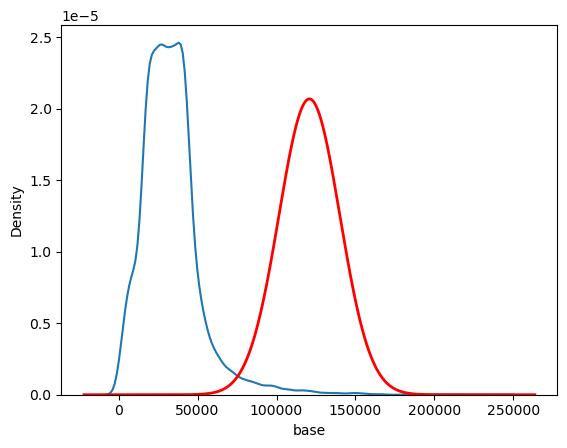

In [271]:
plot_with_normal(earnings["base"])

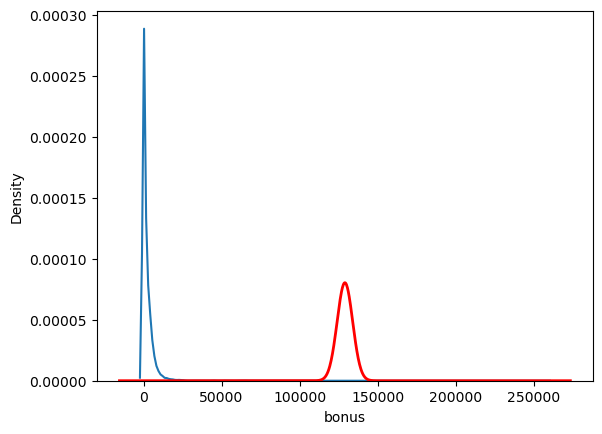

In [272]:
plot_with_normal(earnings["bonus"])

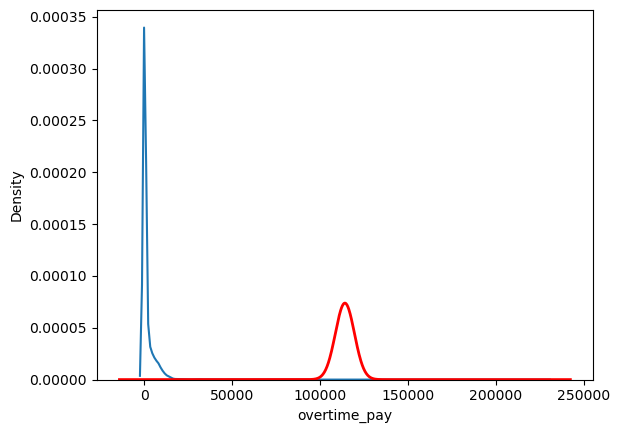

In [273]:
plot_with_normal(earnings["overtime_pay"])

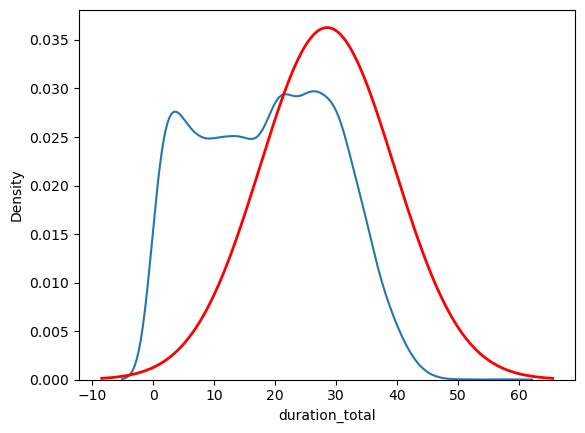

In [274]:
plot_with_normal(earnings["duration_total"])

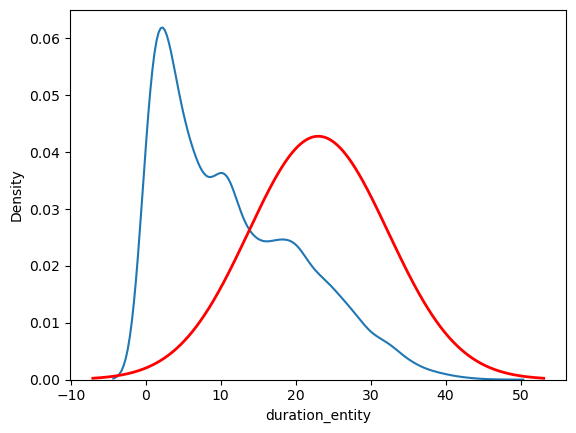

In [275]:
plot_with_normal(earnings["duration_entity"])

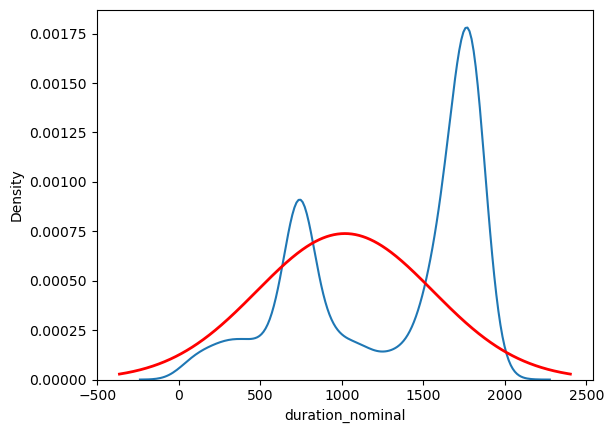

In [276]:
plot_with_normal(earnings["duration_nominal"])

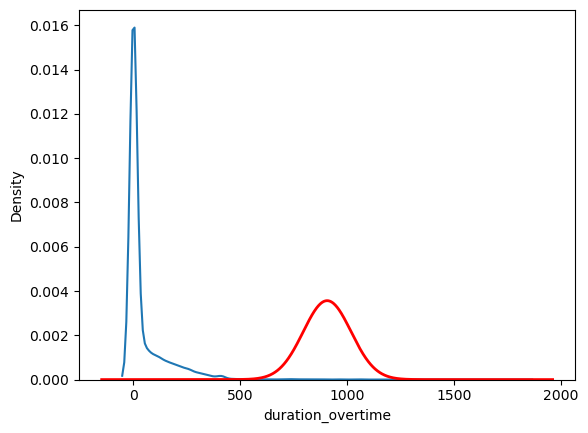

In [277]:
plot_with_normal(earnings["duration_overtime"])

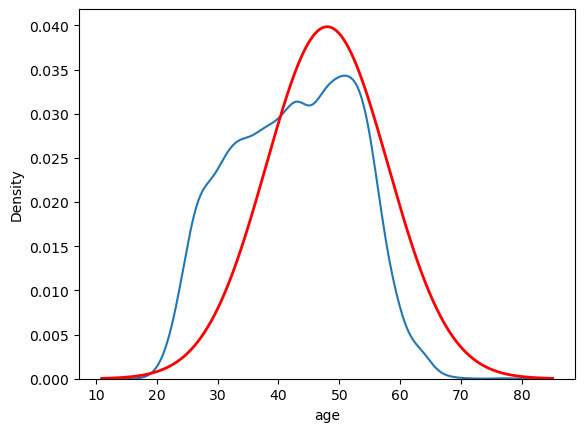

In [278]:
plot_with_normal(earnings["age"])

### **1.3**  
Duration total and age are close to normal distribution.  
Base, bonus, overtime_pay, duration_entity, duration_overtime are left-skewed.  
Duration_nominal is right skewed with two peaks - smaller one corresponding to half time employment, bigger one with full time employment.  


In [279]:
quantitative_vars = ["base", "bonus", "overtime_pay", "duration_total", "duration_entity", "duration_nominal", "duration_overtime"]
correlations = earnings[quantitative_vars].corr()
correlations

base     bonus  overtime_pay  duration_total  \
base               1.000000  0.211216      0.184220        0.248362   
bonus              0.211216  1.000000     -0.054103        0.074788   
overtime_pay       0.184220 -0.054103      1.000000       -0.004601   
duration_total     0.248362  0.074788     -0.004601        1.000000   
duration_entity    0.272979  0.033600      0.054860        0.653426   
duration_nominal   0.274528  0.237138     -0.154939        0.240686   
duration_overtime  0.163426 -0.077111      0.865363       -0.020661   

                   duration_entity  duration_nominal  duration_overtime  
base                      0.272979          0.274528           0.163426  
bonus                     0.033600          0.237138          -0.077111  
overtime_pay              0.054860         -0.154939           0.865363  
duration_total            0.653426          0.240686          -0.020661  
duration_entity           1.000000          0.156117           0.061260  
duration_nominal          0.156117          1.000000          -0.235299  
duration_overtime         0.061260         -0.235299           1.000000

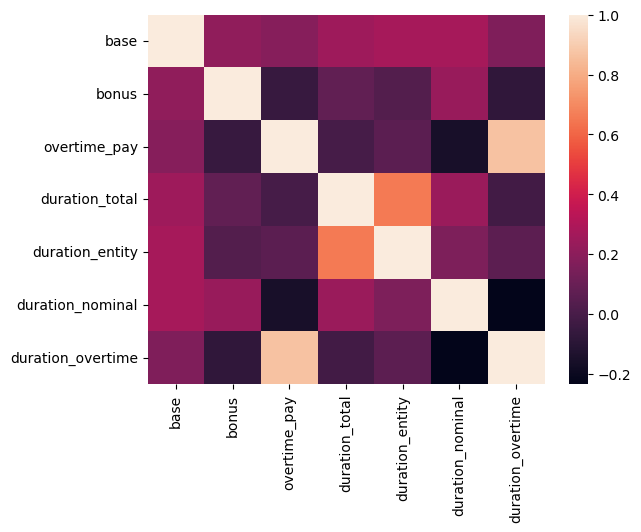

In [280]:
sns.heatmap(correlations)
plt.show()

### **2** 
I used Pearson’s correlation coefficient.  
There is a strong correlation between duration_overtime and overtime_pay, which makes sense since the longer you work the more you get paid.  
There is a strong correlation between duration_entity and duration_total - the longer employee works in reporting entity, the longer they work in total.  

### **3** 

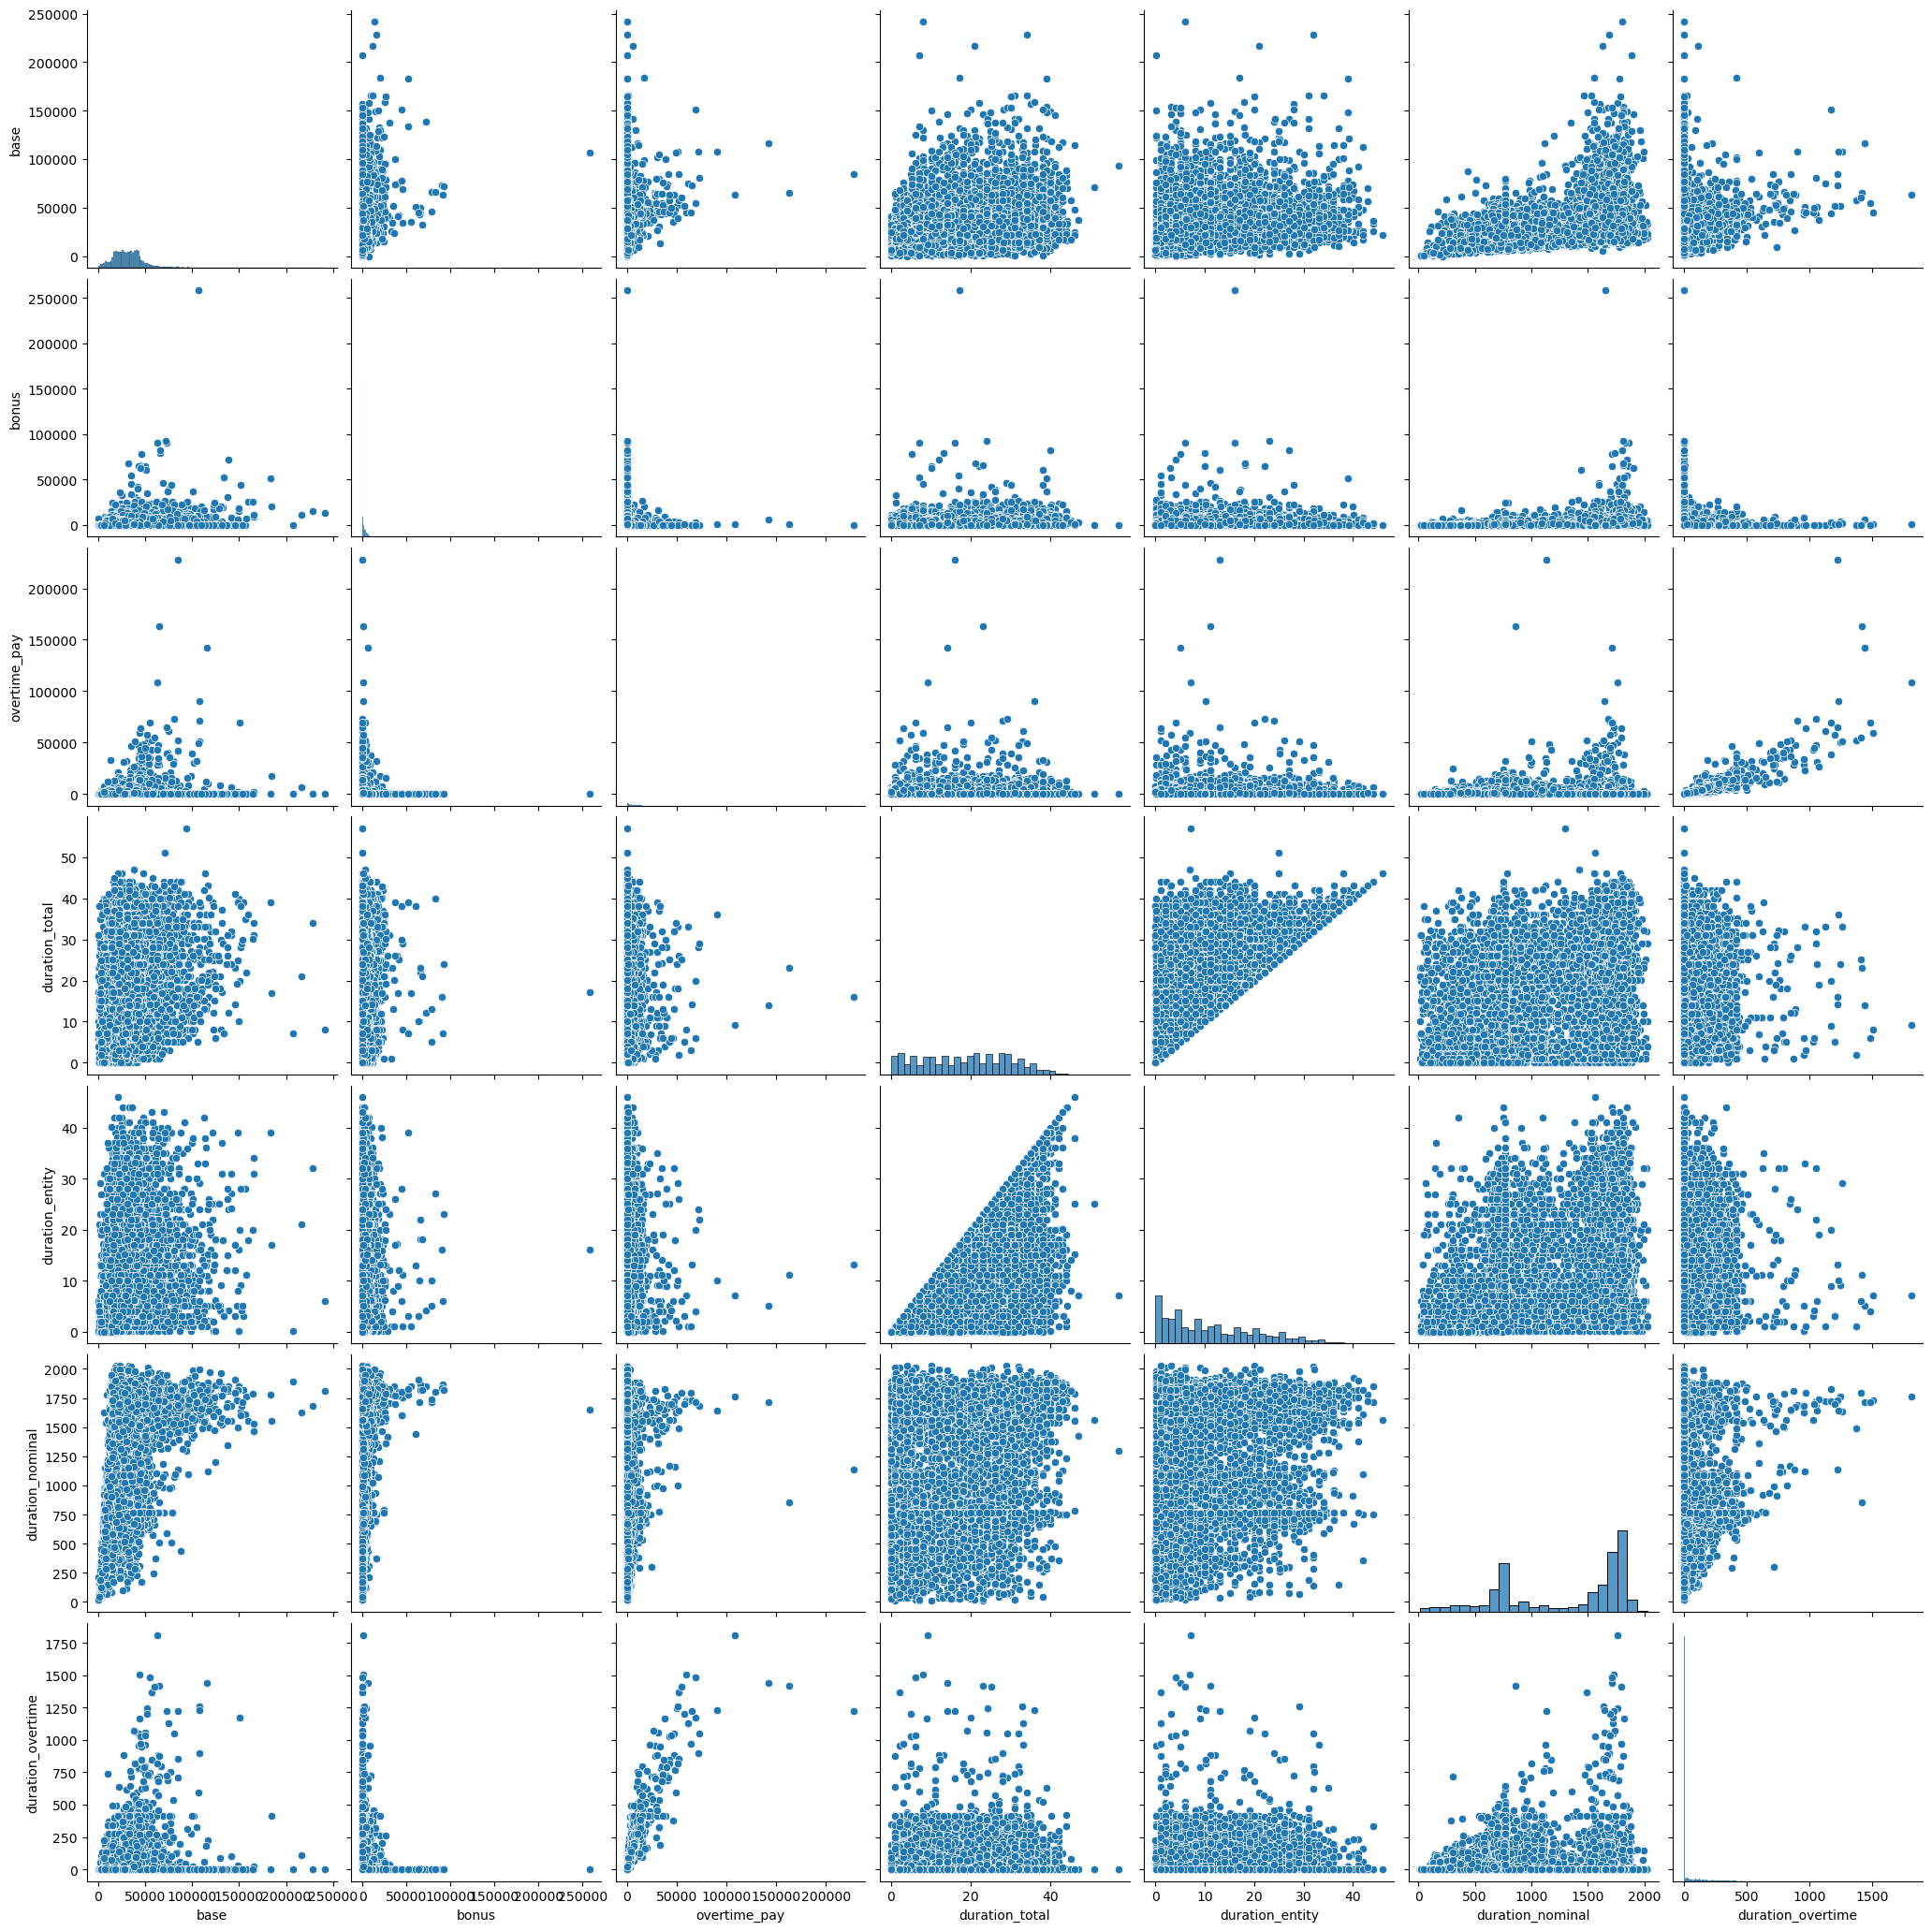

In [281]:
sns.pairplot(earnings[quantitative_vars], height=3);

In [282]:
px.scatter(earnings, x="duration_overtime", y="overtime_pay")

For short duration_overtime overtime_pay is linear to duration_overtime.
For long duration_overtime overtime_pay increases

In [283]:
px.scatter(earnings, x="bonus", y="overtime_pay")

Large bonus is correlated to no overtime_pay.

In [284]:
px.box(earnings, x="sex", y="base")

Slightly higher mean and bigger deviation of base for male sex.


In [285]:
px.box(earnings, x="sex", y="duration_overtime")

Again larger duration_overtime for male sex.

In [286]:
px.pie(earnings, names="sector")

In [287]:
px.pie(earnings, names="section_07")

In [288]:
px.pie(earnings, names="sex")

In [289]:
px.pie(earnings, names="education")

In [290]:
px.pie(earnings, names="contract")

### **4** 
dataset is large and age distribution is close to normal distribution, so we can use norm to calculate confidence interval

In [291]:
# mean confidence interval
st.norm.interval(alpha=0.99, loc=np.mean(earnings["age"]), scale=st.sem(earnings["age"]))

(42.2242879726779, 42.71607566368574)

In [292]:
# variance confidence interval as in https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers#python_ci_var
alpha = 0.01             # significance level = 1%
n = len(earnings["age"])               # sample sizes
s2 = np.var(earnings["age"], ddof=1)   # sample variance
df = n - 1                 # degrees of freedom

upper = (n - 1) * s2 / st.chi2.ppf(alpha / 2, df)
lower = (n - 1) * s2 / st.chi2.ppf(1 - alpha / 2, df)
(lower, upper)

(96.84602609043314, 103.81334720276196)

In [293]:
# median confidence interval as in https://www.statology.org/confidence-interval-for-median/
n = len(earnings["age"]) 
z = 2.58 # z critical vaue for 0.99 confidence level

j = np.round(n*(0.5) - z*np.sqrt(n*(0.5)*(0.5))).astype(int)
k = np.round(n*(0.5) + z*np.sqrt(n*(0.5)*(0.5))).astype(int)

sorted_age = np.sort(earnings["age"])
lower = sorted_age[j-1]
upper = sorted_age[k-1]
(lower, upper)

(43, 43)

### **5(a)** 
independent t-test  
assumptions - normal distribution, homogeneity of variance.  
H0 There are significant differences between the base salary of the employees of the public
and private sector.   
H1 There are no significant differences between the base salary of the employees of the public
and private sector.  
H0 accepted.

In [294]:
st.ttest_ind(earnings['base'][earnings['sector'] == 'public'],
                earnings['base'][earnings['sector'] == 'private'])

Ttest_indResult(statistic=3.20901588780705, pvalue=0.0013357221463325317)

### **5(b)** 
independent t-test  
assumptions - normal distribution, homogeneity of variance..  
I don't see column for reporting entity, so i'll just calculate means for different sector, section_07 pairs.  
H0 Among employees that are younger than 30 years old, the mean total duration of the
employment is not equal to the mean total duration of the employment in the reporting
entity.  
H1 Among employees that are younger than 30 years old, the mean total duration of the
employment is equal to the mean total duration of the employment in the reporting
entity.  
H0 accepted.

In [295]:

st.ttest_ind(earnings[earnings['age'] < 30].groupby(['sector', 'section_07'])['duration_total'].mean(),
                earnings.groupby(['sector', 'section_07'])['duration_total'].mean())

Ttest_indResult(statistic=-10.716180562558794, pvalue=8.402677037313277e-07)

In [296]:
earnings.groupby(['sector', 'section_07'])['duration_total'].mean()

sector   section_07                                                   
private  Education                                                        11.077470
         Human Health and Social Work Activities                          19.043500
         Public Administration and Defence; Compulsory Social Security    17.188333
public   Education                                                        18.324617
         Human Health and Social Work Activities                          19.793613
         Public Administration and Defence; Compulsory Social Security    18.355378
Name: duration_total, dtype: float64

In [297]:
earnings[earnings['age'] < 30].groupby(['sector', 'section_07'])['duration_total'].mean()

sector   section_07                                                   
private  Education                                                        3.204773
         Human Health and Social Work Activities                          3.577179
         Public Administration and Defence; Compulsory Social Security    4.010000
public   Education                                                        2.754511
         Human Health and Social Work Activities                          2.856216
         Public Administration and Defence; Compulsory Social Security    3.349696
Name: duration_total, dtype: float64

### **5(c)** 
simple linear regression test  
H0 A shorter total duration of the employment is correlated with the longer time actually
worked overtime.  
H1 A shorter total duration of the employment is correlated with the shorter time actually
worked overtime.  
H0 rejected.  

In [298]:
res = st.linregress(earnings["duration_entity"], earnings["duration_overtime"])
res

LinregressResult(slope=0.7357564011217975, intercept=39.31368489109359, rvalue=0.06125953313956437, pvalue=1.273830845394934e-10, stderr=0.11431075175412694, intercept_stderr=1.6834627237356212)

In [299]:
px.scatter(earnings, x="duration_entity", y="duration_overtime", trendline="ols")

### **6(a)** 
Levene’s test  
H0 variances of base in private, and public sector are different.  
H1 variances of base in private, and public sector are not different.  
H0 rejected.  

In [300]:
st.levene(earnings["base"][earnings["sector"] == "public"], earnings["base"][earnings["sector"] == "private"])

LeveneResult(statistic=1.651695168274725, pvalue=0.19875543006086424)

### **6(b)** 
Perason's test  
H0 distributions of components of the salaries in administration section are similar to all other sections  
H1 distributions of components of the salaries in administration section are not similar to all other sections  
H0 rejected  


In [301]:
salary_components = ["base", "bonus", "overtime_pay"]
administration_section = "Public Administration and Defence; Compulsory Social Security"
other_sections = earnings["section_07"].unique()[earnings["section_07"].unique() != administration_section]
other_sections

for comp in salary_components:
    for sec in other_sections:
        admin_comp = earnings[comp][earnings["section_07"] == administration_section]
        other_comp = earnings[comp][earnings["section_07"] == sec]
        sample_len = min(len(admin_comp), len(other_comp))
        res = st.pearsonr(admin_comp.sample(n=sample_len), other_comp.sample(n=sample_len))
        print(f"salary_component: {comp}")
        print(f"section: {sec}")
        print(res)

salary_component: base
section: Human Health and Social Work Activities
(-0.017298758225342447, 0.3968495786083875)
salary_component: base
section: Education
(0.025350444649261963, 0.21433823494862814)
salary_component: bonus
section: Human Health and Social Work Activities
(0.02330691591277238, 0.25362064185625577)
salary_component: bonus
section: Education
(-0.010548311634944366, 0.6054266967848908)
salary_component: overtime_pay
section: Human Health and Social Work Activities
(0.03135201547005167, 0.1245809872821382)
salary_component: overtime_pay
section: Education
(0.012484911711757567, 0.5408911638456133)


In [302]:
earnings["section_07"].unique()

array(['Human Health and Social Work Activities', 'Education',
       'Public Administration and Defence; Compulsory Social Security'],
      dtype=object)

### **6(c)** 
chi-square Goodness of Fit Test
H0 duration_total comes from normal distribution
H1 duration_total does not come from normal distribution
H0 rejected

In [303]:
duration_total_len = len(earnings["duration_total"])
duration_total_max = earnings["duration_total"].max()
duration_total_min = earnings["duration_total"].min()

x_pdf = np.linspace(duration_total_min, duration_total_max, duration_total_len)
norm_pdf = scipy.stats.norm.pdf(x_pdf, loc=np.mean(earnings["duration_total"]), scale=earnings["duration_total"].std())


duration_pdf = st.gaussian_kde(earnings["duration_total"])

duration_pdf = np.reshape(duration_pdf(x_pdf).T, duration_total_len)
duration_pdf = duration_pdf * np.sum(norm_pdf) / np.sum(duration_pdf)

st.chisquare(duration_pdf, norm_pdf)

Power_divergenceResult(statistic=21.27877248232595, pvalue=1.0)

### **7** 

In [304]:
admin_earnings = earnings[earnings["section_07"] == administration_section]

admin_earnings["total_salary"] = admin_earnings["base"] + admin_earnings["bonus"] + admin_earnings["overtime_pay"]

admin_earnings["total_hours"] = admin_earnings["duration_nominal"] + admin_earnings["duration_overtime"]

admin_earnings["hourly_rate"] = admin_earnings["total_salary"] / admin_earnings["total_hours"]

In [305]:
def remove_outliers(df, columns, n_std):
    for col in columns:
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

admin_earnings = remove_outliers(admin_earnings, ["hourly_rate", "total_hours"], 3)

In [306]:
admin_earnings_standard = StandardScaler().fit_transform(admin_earnings[["hourly_rate", "total_hours"]])
admin_earnings_standard = pd.DataFrame(admin_earnings_standard, columns = ["hourly_rate", "total_hours"])

In [307]:
max_sil = -1
best_k = 0

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(admin_earnings_standard)

    sil = silhouette_score(admin_earnings_standard, kmeans.labels_)
    # print(sil)
    if sil > max_sil:
        max_sil = sil
        best_k = k

print("max_sil: ", max_sil)
print("best_k: ", best_k)

/home/jan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/jan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/jan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/jan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/jan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The defaul

max_sil:  0.6325133279180758
best_k:  2


In [308]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(admin_earnings_standard)

px.scatter(admin_earnings_standard, x="hourly_rate", y="total_hours", color=kmeans.labels_)

/home/jan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



2 clusters have best silhouette_score, but with 2 clusters data is separated either into low/high hourly rate, or low/high total hours.  
So I prefer using 3 clusters, to get cluster with high total hours, and low hourly rate

In [309]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(admin_earnings_standard)

px.scatter(admin_earnings_standard, x="hourly_rate", y="total_hours", color=kmeans.labels_)

/home/jan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

